In [18]:
# Importing the relevant libraries
import IPython.display
import json
import pandas as pd
import seaborn as sns
import squarify
%matplotlib inline
import random
#import missingno as msno
#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls
import numpy as np
from matplotlib import pyplot as plt

# D3 modules
from IPython.core.display import display, HTML, Javascript
from string import Template# The data to load

ModuleNotFoundError: No module named 'squarify'

Because the training data file is so large (~125 Million rows), in Capstone_1_Cleanup, we took only a subset (~5%) of the unique item_nbrs and extracted their data from the train file. After cleanup, the resulting file created is a merged file. Let's import it here. 

In [2]:
train = pd.read_csv("Data/MergedTrainData.csv")

C:\Users\d56444\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.head()

,Unnamed: 0,date,item_nbr,store_nbr,id,unit_sales,onpromotion,dow,doy,city,...,cluster,family,class,perishable,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,108952,25,7.0,1.0,2,1,1,Salinas,...,1,CLEANING,3024,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,108952,1,NaN,0.0,2,1,1,Quito,...,13,CLEANING,3024,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,108952,2,NaN,0.0,2,1,1,Quito,...,13,CLEANING,3024,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,108952,3,NaN,0.0,2,1,1,Quito,...,8,CLEANING,3024,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,108952,4,NaN,0.0,2,1,1,Quito,...,9,CLEANING,3024,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False


Now we load in the remainder of the data files.

In [4]:
items = pd.read_csv("Data/items.csv")
holiday_events = pd.read_csv("Data/holidays_events.csv")
stores = pd.read_csv("Data/stores.csv")
oil = pd.read_csv("Data/oil.csv",parse_dates=['date'])
transactions = pd.read_csv("Data/transactions.csv",parse_dates=['date'])

# Introduction

In [24]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


Corporacion Favorita is a supermarket chain operating in Ecuador. As part of an effort to improve sales and reduce waste due to perishable food items going bad, they have employed the Kaggle community to try to come up with more accurate sales forecasts for their different locations. An accurate forecasting algorithm has the potential to save Corporacion Favorita lots of money by reducing waste, as well as increase revenue by making sure customers find the items they are looking for. A dissatisfied customer may turn to rival supermarkets for their future needs. 

# Store Locations

The first aspect of Corporacion Favorita's business model that it may be useful to understand is the store location scheme. There appear to be 54 unique store locations dispersed throughout the entire country, with the largest number centered in Quito (the capital) and Guayaquil. 

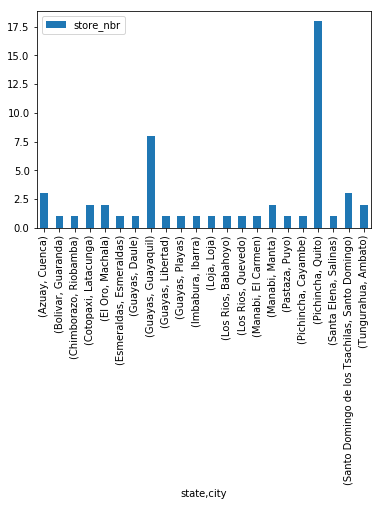

In [21]:
_=pd.pivot_table(data=stores, index=['state','city'], values='store_nbr', aggfunc='count').plot(kind='bar')

By summing up unit_sales by store number, we get a general picture of which stores experience the most sales. Unsurprisingly, it looks like all the highest selling stores are in Quito. 

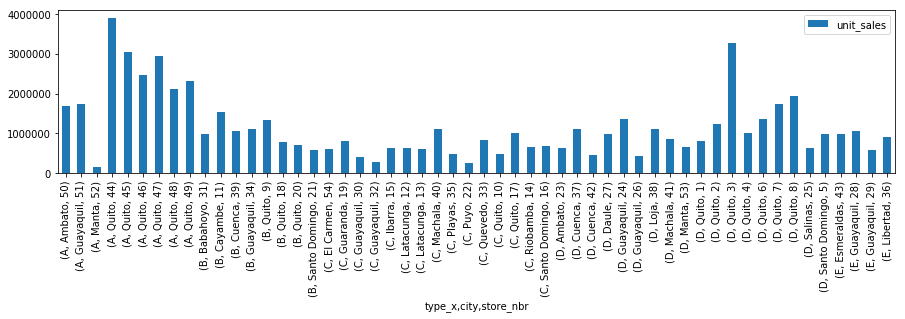

In [28]:
_=pd.pivot_table(data=train, index=['type_x','city','store_nbr'], values='unit_sales', aggfunc='sum').plot(kind='bar', figsize=(15, 3))